In [47]:
import h2o
import pandas as pd
import numpy as np

In [183]:
h2o.shutdown()

H2O session _sid_afd3 closed.


/var/folders/xd/z_ptq9v136q7kj9lf2f4sblh0000gn/T/ipykernel_82055/2900054706.py:1: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown()


In [156]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "17.0.1" 2021-10-19; OpenJDK Runtime Environment Temurin-17.0.1+12 (build 17.0.1+12); OpenJDK 64-Bit Server VM Temurin-17.0.1+12 (build 17.0.1+12, mixed mode)
  Starting server from /Users/mathiasraa/anaconda3/envs/forecasting/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/xd/z_ptq9v136q7kj9lf2f4sblh0000gn/T/tmpg_yhp05s
  JVM stdout: /var/folders/xd/z_ptq9v136q7kj9lf2f4sblh0000gn/T/tmpg_yhp05s/h2o_mathiasraa_started_from_python.out
  JVM stderr: /var/folders/xd/z_ptq9v136q7kj9lf2f4sblh0000gn/T/tmpg_yhp05s/h2o_mathiasraa_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/Oslo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.4
H2O_cluster_version_age:,5 days
H2O_cluster_name:,H2O_from_python_mathiasraa_a4y45p
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [170]:
df = pd.read_csv('../data/processed/data.csv')

# randomly split the data into 80% training, 10% validation, and 10% test sets
train, val, test = np.split(df.sample(frac=1), [int(.8*len(df)), int(.9*len(df))])

In [165]:
train_df = h2o.H2OFrame(train)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [138]:
# test = pd.read_csv('../data/processed/val.csv')

In [171]:
# test = df.copy().iloc[-2000:]
test = h2o.H2OFrame(test)
# selecting feature and label columns
 
x = test.columns
y = 'y'
# remove label classvariable from feature variable
x.remove(y)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [172]:
val_df = pd.read_csv('../data/processed/val.csv')
val = h2o.H2OFrame(val_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [173]:


# import autoML from H2O
from h2o.automl import H2OAutoML
# callh20automl  function 
aml = H2OAutoML(max_runtime_secs = 1700,
                seed = 1,
                balance_classes = False,
                project_name ='Project1',
                sort_metric="MAE"
)
# train model and record time % time 
aml.train(x = x, y = y, training_frame = train_df, validation_frame=val)

AutoML progress: |
00:09:10.71: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
00:09:10.77: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),55/55
# GBM base models (used / total),43/43
# DRF base models (used / total),2/2
# DeepLearning base models (used / total),9/9
# GLM base models (used / total),1/1
Metalearner algorithm,GBM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [142]:
# 74

In [174]:
# View the H2O aml leaderboard
lb = aml.leaderboard
# Print all rows instead of 10 rows
lb.head(rows = lb.nrows)

model_id,mae,rmse,mse,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_5_AutoML_1_20231009_00910,75.8655,227.823,51903.3,nan,51903.3
StackedEnsemble_BestOfFamily_5_AutoML_1_20231009_00910,79.1731,238.736,56994.8,nan,56994.8
GBM_grid_1_AutoML_1_20231009_00910_model_5,79.2652,239.707,57459.5,nan,57459.5
StackedEnsemble_AllModels_2_AutoML_1_20231009_00910,79.2776,235.845,55622.9,nan,55622.9
StackedEnsemble_AllModels_1_AutoML_1_20231009_00910,79.2801,235.812,55607.5,nan,55607.5
StackedEnsemble_BestOfFamily_6_AutoML_1_20231009_00910,79.4537,237.839,56567.3,nan,56567.3
StackedEnsemble_BestOfFamily_4_AutoML_1_20231009_00910,79.4686,237.942,56616.2,nan,56616.2
StackedEnsemble_BestOfFamily_2_AutoML_1_20231009_00910,79.6231,236.615,55986.8,nan,55986.8
StackedEnsemble_BestOfFamily_3_AutoML_1_20231009_00910,79.7132,236.586,55972.8,nan,55972.8
StackedEnsemble_AllModels_4_AutoML_1_20231009_00910,79.7399,230.6,53176.3,nan,53176.3


In [144]:

# Get the top model of leaderboard
se = aml.leader
 
# Get the metalearner model of top model
metalearner = h2o.get_model(se.metalearner()['name'])
 
# list baselearner models :
metalearner.varimp()

/Users/mathiasraa/anaconda3/envs/forecasting/lib/python3.10/site-packages/h2o/estimators/stackedensemble.py:925: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  warnings.warn(


[('GBM_grid_1_AutoML_1_20231008_233252_model_4',
  102591094784.0,
  1.0,
  0.4103272745864326),
 ('GBM_4_AutoML_1_20231008_233252',
  70674554880.0,
  0.6888956105673836,
  0.28267265835867095),
 ('GBM_grid_1_AutoML_1_20231008_233252_model_5',
  46314553344.0,
  0.4514480856405011,
  0.18524146259812924),
 ('GBM_grid_1_AutoML_1_20231008_233252_model_21',
  8568765952.0,
  0.08352348680985493,
  0.03427196470664362),
 ('GBM_grid_1_AutoML_1_20231008_233252_model_10',
  7817851904.0,
  0.07620400114123028,
  0.03126858010086242),
 ('GBM_grid_1_AutoML_1_20231008_233252_model_15',
  4981415424.0,
  0.04855602169455449,
  0.01992386004668624),
 ('GBM_grid_1_AutoML_1_20231008_233252_model_23',
  2043001088.0,
  0.019914019752897933,
  0.008171265451266993),
 ('GBM_grid_1_AutoML_1_20231008_233252_model_1',
  1710973184.0,
  0.01667759943104576,
  0.006843273921185246),
 ('GBM_grid_1_AutoML_1_20231008_233252_model_18',
  1558483712.0,
  0.015191218256139123,
  0.006233371184689226),
 ('GBM_gri

In [180]:


# model performance on test dataset
model = h2o.get_model('StackedEnsemble_AllModels_5_AutoML_1_20231009_00910')
model.model_performance(val)

ModelMetricsRegression: stackedensemble
** Reported on test data. **

MSE: 111719.24183832217
RMSE: 334.24428467562785
MAE: 119.17964770616608
RMSLE: 1.0534732712588932
Mean Residual Deviance: 111719.24183832217

In [ ]:
# 1. TRY: 135.78573135683502
# 2. TRY: 145.10572118414476
# 3. TRY: 135.36631966707503
# 4. TRY: 119.17964770616608 – Using estimated data to train

In [176]:
pred = model.predict(val).as_data_frame()


stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/Users/mathiasraa/anaconda3/envs/forecasting/lib/python3.10/site-packages/h2o/job.py:81: UserWarning: Test/Validation dataset is missing column 'location': substituting in a column of NaN
  warnings.warn(w)


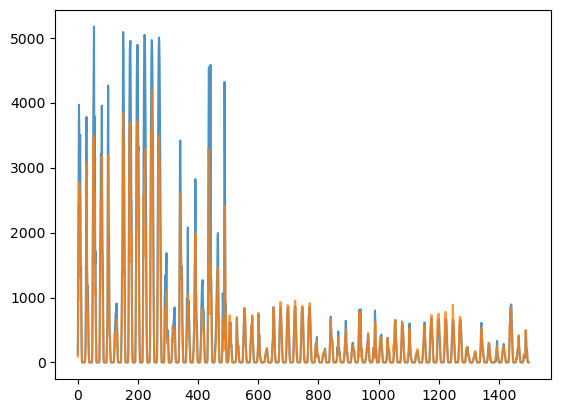

In [177]:
from matplotlib import pyplot as plt

plt.plot(val_df['y'], alpha=0.8)
plt.plot(pred, alpha=0.8)

In [ ]:
kaggle_df[~kaggle_df["dew_point_2m:K"].isna()]

,date_calc,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,direct_rad:W,...,rel_hum_2h-,eff_cloud_1h-,eff_cloud_2h-,precip_5min_1h-,precip_5min_2h-,direct_rad_rolling_mean,diffuse_rad_rolling_mean,cloud_rolling_mean,precip_rolling_mean,location
0,2023-04-30 07:00:04,4.325,1.28675,912.7000,0.000,1061.5500,0.0,271.65002,0.000,0.000000,...,78.000,77.475,88.100000,0.0,0.0,NaN,NaN,NaN,NaN,A
1,2023-04-30 07:00:04,4.275,1.28600,1482.1000,0.000,1075.1001,0.0,271.45000,0.000,0.000000,...,75.625,88.100,68.600000,0.0,0.0,NaN,NaN,NaN,NaN,A
2,2023-04-30 07:00:04,4.150,1.28375,1791.3000,0.000,1200.4000,0.0,271.05000,0.000,0.000000,...,74.225,68.600,66.300000,0.0,0.0,0.000000,0.000000,80.174998,0.0,A
3,2023-04-30 07:00:04,4.025,1.28200,2312.8750,11.675,1179.8500,0.0,270.65000,9.375,2.100000,...,71.100,66.300,74.075000,0.0,0.0,0.700000,3.125000,78.058332,0.0,A
4,2023-04-30 07:00:04,3.900,1.28100,2198.2998,76.875,920.0500,0.0,270.37500,47.400,25.450000,...,66.600,74.075,58.550003,0.0,0.0,9.183334,18.925001,74.333333,0.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4603,2023-07-02 07:00:31,8.400,1.19675,3493.6500,84.775,1967.3750,0.0,281.70000,32.200,13.450001,...,80.425,78.075,79.550000,0.0,0.0,13.541667,58.833335,93.508334,0.0,C
4604,2023-07-02 07:00:31,8.600,1.20000,3078.7500,24.550,1449.5000,0.0,282.02500,13.875,2.400000,...,83.800,79.550,100.000000,0.0,0.0,10.633333,34.733334,86.966667,0.0,C
4605,2023-07-02 07:00:31,8.875,1.20350,2308.4000,1.225,1543.6500,0.0,282.35000,1.250,0.000000,...,84.600,100.000,100.000000,0.0,0.0,5.283334,15.775000,82.524999,0.0,C
4606,2023-07-02 07:00:31,9.000,1.20650,2000.4500,0.000,1725.9500,0.0,282.60000,0.000,0.000000,...,NaN,100.000,NaN,0.0,NaN,0.800000,5.041667,86.466665,0.0,C


In [181]:
kaggle_df = pd.read_csv('../data/processed/kaggle.csv')
kaggle = h2o.H2OFrame(kaggle_df[~kaggle_df["dew_point_2m:K"].isna()])

model = h2o.get_model('StackedEnsemble_AllModels_5_AutoML_1_20231009_00910')
prediction = model.predict(kaggle)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/Users/mathiasraa/anaconda3/envs/forecasting/lib/python3.10/site-packages/h2o/job.py:81: UserWarning: Test/Validation dataset is missing column 'location': substituting in a column of NaN
  warnings.warn(w)


In [182]:
pred_df = prediction.as_data_frame()
pred_df["prediction"] = np.maximum(pred_df, 0)
pred_df = pred_df.drop(columns=["predict"])
pred_df.index.name = "id"

pred_df.to_csv('../data/processed/prediction.csv')